In [111]:
import time
st_time = time.time()

In [112]:
# !pip install autoviz

In [113]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler ,RobustScaler
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split

In [115]:
trpath = '/content/drive/MyDrive/train.csv'
traindf = pd.read_csv(trpath)

In [116]:
traindf

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [117]:
traindf.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [118]:
traindf.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [119]:
# AV = AutoViz_Class()
# piz = AV.AutoViz(
#     trpath,
#     sep=',',
#     chart_format = 'html', # 'server,'html,'png'
#     verbose = 2
# )
# pez = AV.AutoViz(
#     tspath,
#     sep=',',
#     chart_format = 'html', # 'server,'html,'png'
#     verbose = 2
# )

In [120]:
y = traindf['price_range']
y = pd.DataFrame(y)
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [121]:
x = traindf.drop(['price_range'],axis=1)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [123]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600, 1), (400, 1))

In [124]:
def cr_scaler(my_scaler,my_x_train,my_x_test):
  my_scaler.fit_transform(my_x_train)
  my_scaler.fit_transform(my_x_test)

In [125]:
def my_modelfit(my_model,my_x_train,my_y_train):
  my_model.fit(my_x_train, my_y_train)

In [126]:
def my_predict(my_model,my_x_test):
  y_pred = my_model.predict(my_x_test)
  return y_pred

In [127]:
def my_f1_score(my_y_test,my_y_pred):
  f1 = f1_score(my_y_test, my_y_pred, average="micro")
  return f1

In [128]:
def my_conf_matrix(my_y_test,my_y_pred):
  cm = confusion_matrix(my_y_test, my_y_pred)
  cm_norm = np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
  sns.heatmap(cm_norm,cmap='Greens',annot=True,
              cbar_kws={'orientation' : 'vertical','label' : 'Color bar'},
              fmt='.2f'
              )
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()
  # cm_display = ConfusionMatrixDisplay(cm)
  # cm_display.plot()
  # plt.show()

In [129]:
clf = SVC(kernel= 'linear',C=5)
clf1 = GaussianNB()
clf2 = KNeighborsClassifier(n_neighbors=5) 
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()
clf5 = SVC(kernel= 'rbf',C=5)
clf5 = LinearSVC()
Sscaler = StandardScaler()
Rscaler = RobustScaler()

0.9725


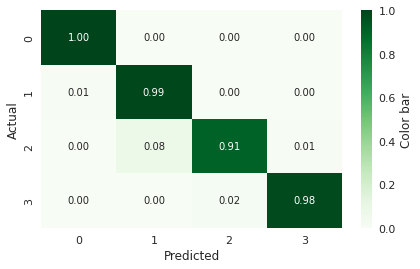

0.8075


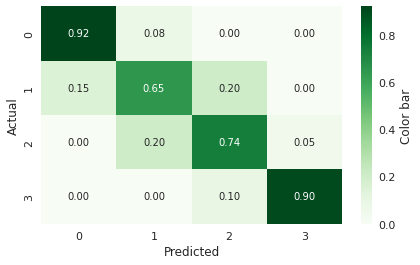

0.8975


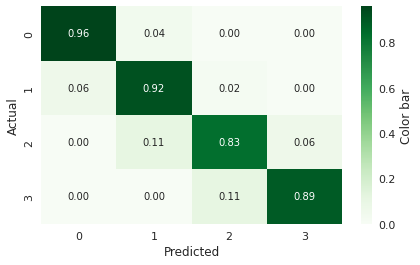

0.8225


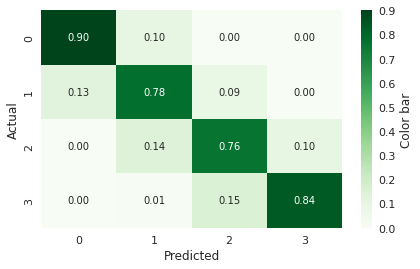

0.865


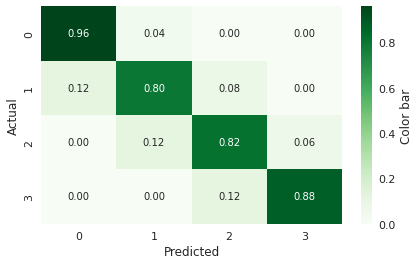

0.4925


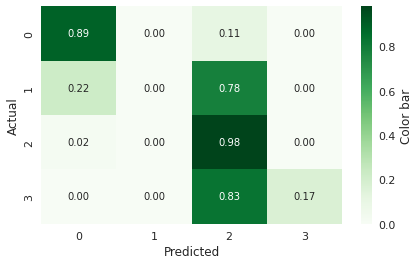

In [130]:
my_pipe = make_pipeline(cr_scaler(Sscaler, x_train, x_test), my_modelfit(clf, x_train, y_train))
y_pred_res = my_predict(clf,x_test)
print(my_f1_score(y_test,y_pred_res))
my_conf_matrix(y_test,y_pred_res)

my_pipe1 = make_pipeline(cr_scaler(Sscaler, x_train, x_test), my_modelfit(clf1, x_train, y_train))
y_pred_res1 = my_predict(clf1,x_test)
print(my_f1_score(y_test,y_pred_res1))
my_conf_matrix(y_test,y_pred_res1)

my_pipe2 = make_pipeline(cr_scaler(Sscaler, x_train, x_test), my_modelfit(clf2, x_train, y_train))
y_pred_res2 = my_predict(clf2,x_test)
print(my_f1_score(y_test,y_pred_res2))
my_conf_matrix(y_test,y_pred_res2)

my_pipe3 = make_pipeline(cr_scaler(Sscaler, x_train, x_test), my_modelfit(clf3, x_train, y_train))
y_pred_res3 = my_predict(clf3,x_test)
print(my_f1_score(y_test,y_pred_res3))
my_conf_matrix(y_test,y_pred_res3)

my_pipe4 = make_pipeline(cr_scaler(Sscaler, x_train, x_test), my_modelfit(clf4, x_train, y_train))
y_pred_res4 = my_predict(clf4,x_test)
print(my_f1_score(y_test,y_pred_res4))
my_conf_matrix(y_test,y_pred_res4)

my_pipe5 = make_pipeline(cr_scaler(Sscaler, x_train, x_test), my_modelfit(clf5, x_train, y_train))
y_pred_res5 = my_predict(clf5,x_test)
print(my_f1_score(y_test,y_pred_res5))
my_conf_matrix(y_test,y_pred_res5)

0.9725


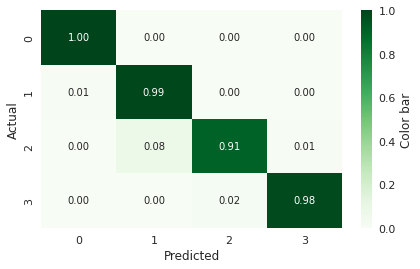

0.8075


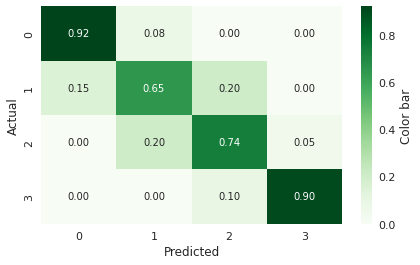

0.8975


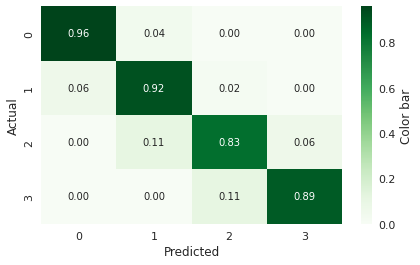

0.8275


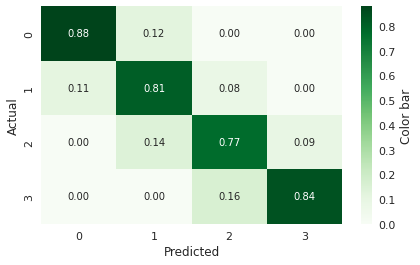

0.87


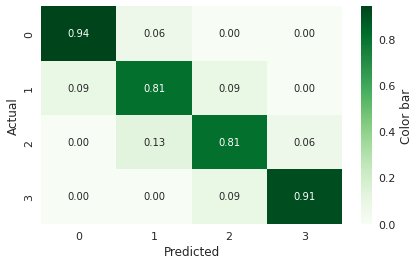

0.4675


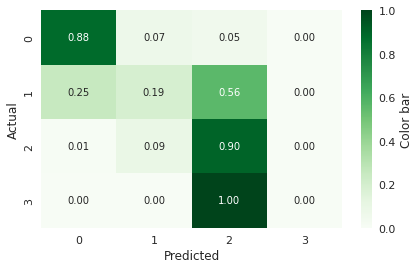

In [131]:
my_pipe6 = make_pipeline(cr_scaler(Rscaler, x_train, x_test), my_modelfit(clf, x_train, y_train))
y_pred_res6 = my_predict(clf,x_test)
print(my_f1_score(y_test,y_pred_res6))
my_conf_matrix(y_test,y_pred_res6)

my_pipe7 = make_pipeline(cr_scaler(Rscaler, x_train, x_test), my_modelfit(clf1, x_train, y_train))
y_pred_res7 = my_predict(clf1,x_test)
print(my_f1_score(y_test,y_pred_res7))
my_conf_matrix(y_test,y_pred_res7)

my_pipe8 = make_pipeline(cr_scaler(Rscaler, x_train, x_test), my_modelfit(clf2, x_train, y_train))
y_pred_res8 = my_predict(clf2,x_test)
print(my_f1_score(y_test,y_pred_res8))
my_conf_matrix(y_test,y_pred_res8)

my_pipe9 = make_pipeline(cr_scaler(Rscaler, x_train, x_test), my_modelfit(clf3, x_train, y_train))
y_pred_res9 = my_predict(clf3,x_test)
print(my_f1_score(y_test,y_pred_res9))
my_conf_matrix(y_test,y_pred_res9)

my_pipe10 = make_pipeline(cr_scaler(Rscaler, x_train, x_test), my_modelfit(clf4, x_train, y_train))
y_pred_res10 = my_predict(clf4,x_test)
print(my_f1_score(y_test,y_pred_res10))
my_conf_matrix(y_test,y_pred_res10)

my_pipe11 = make_pipeline(cr_scaler(Rscaler, x_train, x_test), my_modelfit(clf5, x_train, y_train))
y_pred_res11 = my_predict(clf5,x_test)
print(my_f1_score(y_test,y_pred_res11))
my_conf_matrix(y_test,y_pred_res11)

In [132]:
end_time = time.time()

In [133]:
print(end_time-st_time)

36.54682540893555
